# Tutorial introductorio a agentes en mesa

En este tutorial se explorará cómo crear agentes en mesa.

Primero se importará el modelo ya creado:

In [1]:
from money_model_spaceless import *

model = MoneyModel(10)
for i in range(10):
    model.step()

Después, se mostrará los resultados anteriores:

(array([4., 0., 0., 3., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

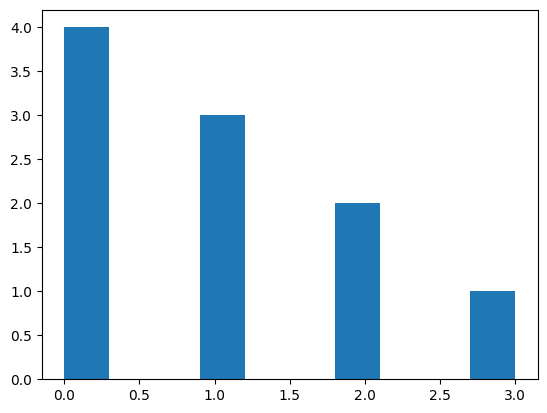

In [2]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

Creando múltiples modelos, podemos ver el siguiente comportamiento:

(array([436., 305., 146.,  72.,  25.,  11.,   5.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

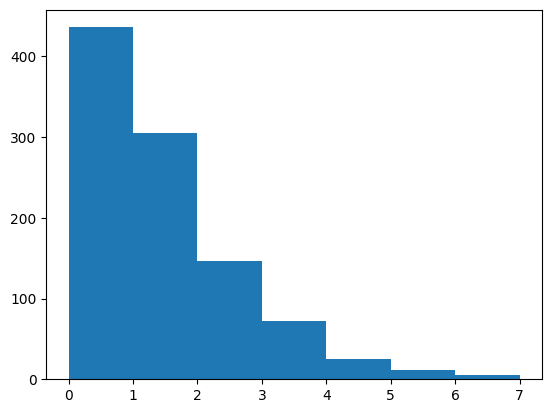

In [3]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins=range(max(all_wealth) + 1))

In [4]:
from money_model_spacefull import *

model = MoneyModel(50, 10, 10)
for i in range(20):
    model.step()

Using the money model with spaces and moving around added, we can then visualize the cells where the agents are at using numpy and plotting for all the cells every agent in a heat map.

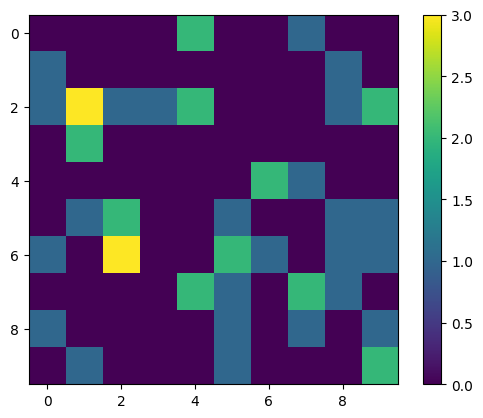

In [5]:
import numpy as np

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation="nearest")
plt.colorbar()

Nonetheless, we can also create the information using the datacollector component from the model component as such:

In [6]:
model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()

<AxesSubplot: >

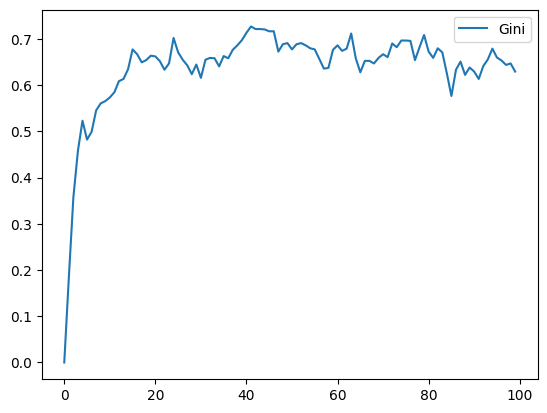

In [7]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

And the agent wealth can additionally be found using datacollector once again:

In [8]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

In [9]:
agent_wealth.tail()

Wealth
Step AgentID        
99   45            1
     46            2
     47            0
     48            0
     49            0

By using pandas data frames, we can create a histrogram as such:

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot: >

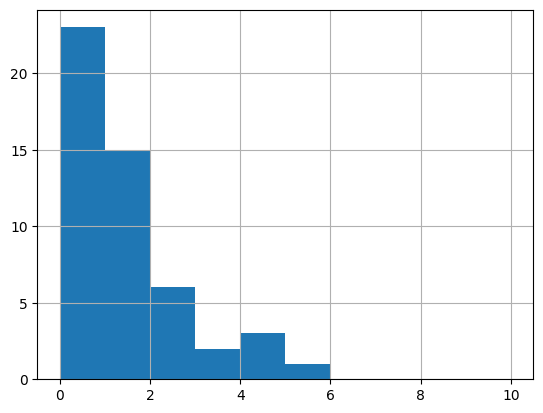

In [10]:
print(type(agent_wealth))
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max() + 1))

<AxesSubplot: xlabel='Step'>

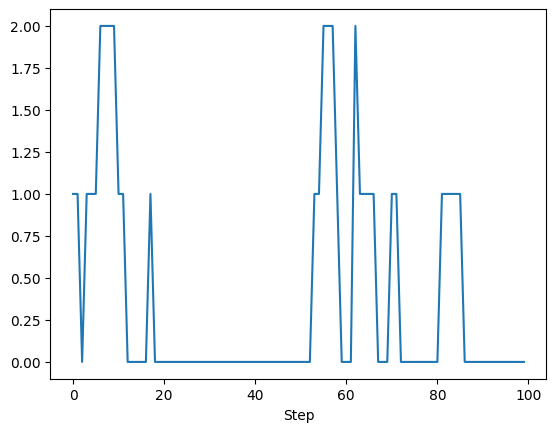

In [11]:
one_agent_wealth = agent_wealth.xs(49, level="AgentID")
one_agent_wealth.Wealth.plot()

In [12]:
import pandas as pd

params = {"width": 10, "height": 10, "N": range(10, 500, 10)}

results = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=5,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

results_df = pd.DataFrame(results)
print(results_df.keys())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 245/245 [00:28<00:00,  8.72it/s]


Index(['RunId', 'iteration', 'Step', 'width', 'height', 'N', 'Gini', 'AgentID',
       'Wealth'],
      dtype='object')


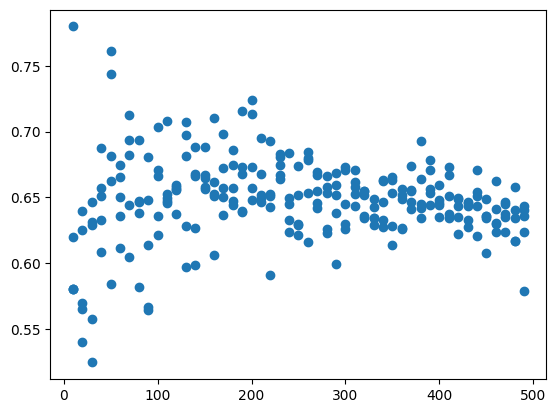

In [13]:
results_filtered = results_df[(results_df.AgentID == 0) & (results_df.Step == 100)]
N_values = results_filtered.N.values
gini_values = results_filtered.Gini.values
plt.scatter(N_values, gini_values)

In [14]:
# First, we filter the results
one_episode_wealth = results_df[(results_df.N == 10) & (results_df.iteration == 2)]
# Then, print the columns of interest of the filtered data frame
print(
    one_episode_wealth.to_string(
        index=False, columns=["Step", "AgentID", "Wealth"], max_rows=25
    )
)
# For a prettier display we can also convert the data frame to html, uncomment to test in a Jupyter Notebook
# from IPython.display import display, HTML
# display(HTML(one_episode_wealth.to_html(index=False, columns=['Step', 'AgentID', 'Wealth'], max_rows=25)))

 Step  AgentID  Wealth
    0        0       1
    0        1       1
    0        2       1
    0        3       1
    0        4       1
    0        5       1
    0        6       1
    0        7       1
    0        8       1
    0        9       1
    1        0       1
    1        1       1
  ...      ...     ...
   99        8       1
   99        9       1
  100        0       1
  100        1       0
  100        2       4
  100        3       2
  100        4       0
  100        5       1
  100        6       0
  100        7       0
  100        8       1
  100        9       1


In [15]:
results_one_episode = results_df[
    (results_df.N == 10) & (results_df.iteration == 1) & (results_df.AgentID == 0)
]
print(results_one_episode.to_string(index=False, columns=["Step", "Gini"], max_rows=25))

 Step  Gini
    0  0.00
    1  0.18
    2  0.32
    3  0.54
    4  0.54
    5  0.54
    6  0.54
    7  0.54
    8  0.46
    9  0.58
   10  0.58
   11  0.58
  ...   ...
   89  0.62
   90  0.62
   91  0.62
   92  0.62
   93  0.62
   94  0.62
   95  0.62
   96  0.62
   97  0.62
   98  0.62
   99  0.58
  100  0.58
